In [618]:
import pandas as pd
import numpy as np

Column_names = ['poisonous','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv("C:/Users/Lenovo/Desktop/30_Project/agaricus-lepiota.data", delimiter = ",", names = Column_names)
print(df.head())
df.shape[0]
df.dtypes

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1             

poisonous                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [520]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print ()
# count_question_marks = (df == '?').sum().sum()
# percentage_missing_per_column = ((count_question_marks / len(df)) * 100).round(2)
# missing_columns = df.columns[(df == '?').any()].tolist()
# print (f"Number of rows with missing values: {count_question_marks}")
# print("Percentage of missing values:", percentage_missing_per_column,"%")
# print("Columns with '?' as missing values:", missing_columns)

Unique values in 'poisonous': ['p' 'e']

Unique values in 'cap-shape': ['x' 'b' 's' 'f' 'k' 'c']

Unique values in 'cap-surface': ['s' 'y' 'f' 'g']

Unique values in 'cap-color': ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

Unique values in 'bruises': ['t' 'f']

Unique values in 'odor': ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

Unique values in 'gill-attachment': ['f' 'a']

Unique values in 'gill-spacing': ['c' 'w']

Unique values in 'gill-size': ['n' 'b']

Unique values in 'gill-color': ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

Unique values in 'stalk-shape': ['e' 't']

Unique values in 'stalk-root': ['e' 'c' 'b' 'r' '?']

Unique values in 'stalk-surface-above-ring': ['s' 'f' 'k' 'y']

Unique values in 'stalk-surface-below-ring': ['s' 'f' 'y' 'k']

Unique values in 'stalk-color-above-ring': ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

Unique values in 'stalk-color-below-ring': ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

Unique values in 'veil-type': ['p']

Unique values in 'veil-color': ['w'

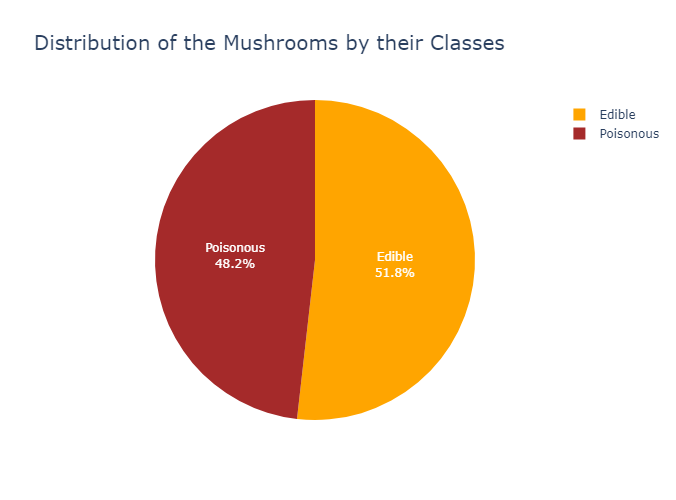

<Figure size 2000x1600 with 0 Axes>

In [522]:
# see whether it is poisonous or not
# import matplotlib
# from matplotlib import pylab as plt
# import matplotlib.pyplot as plt

# # Data for the pie chart
# labels = ['Edible', 'Poisonous']
# sizes = [df.describe()['poisonous']['freq'], df.describe()['poisonous']['count']-df.describe()['poisonous']['freq']]
# colors = ['#6699FF', '#FF6666']
# plt.figure(figsize=(7, 7))
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14})
# plt.title('Distribution of the Mushrooms by their Classes', fontsize=18)
# plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# # Display the pie chart
# plt.show()

import plotly.graph_objects as go
labels = ['Edible', 'Poisonous']
values = [df.describe()['poisonous']['freq'], df.describe()['poisonous']['count']-df.describe()['poisonous']['freq']]
plt.figure(figsize=(20,16))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', 
                             insidetextorientation='horizontal',
                             marker=dict(colors=['#FFA500', 'brown']),
                            insidetextfont=dict(color='white'))])

fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', 
                  title_font_size=20,
                  autosize=False,
                  width=700, height=500)

# Show the chart
fig.show()


## About cap
Cap is the top part of a mushroom. Now we will found the relationship of whether it is poisonous or not and its cap atrributes. It includes: its shape (bell/conical/convex/flat/knobbed/sunken), its surface (fibrous, grooves, scaly, smooth), and its color (brown, cinnamon, gray, green, pink, purple, red, white, yellow)

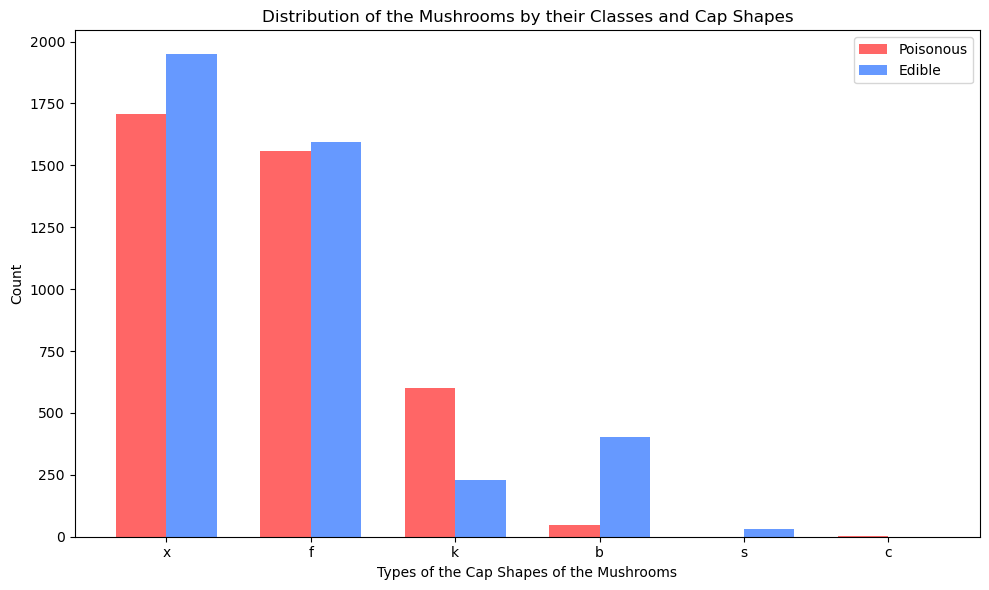

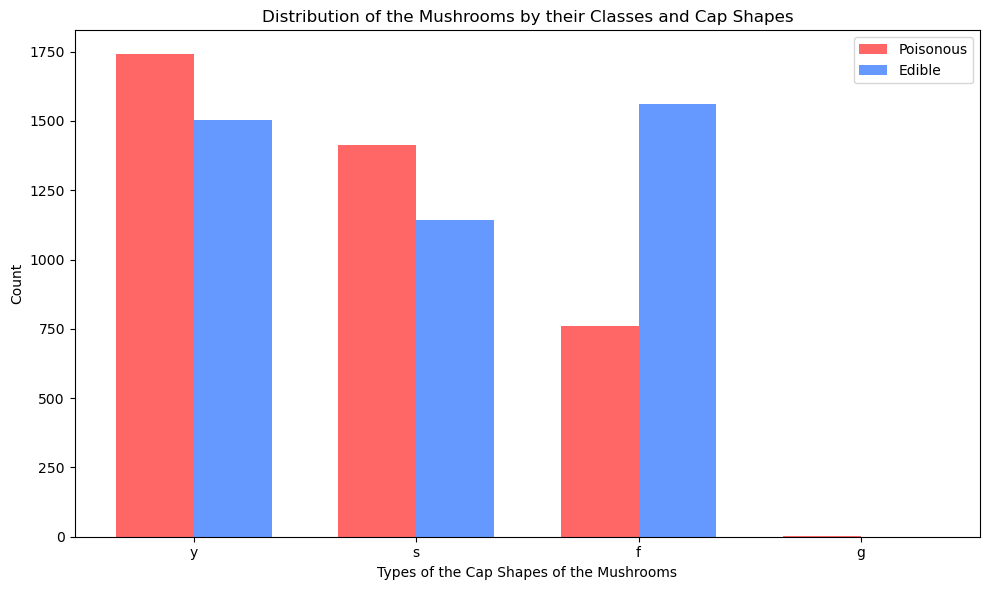

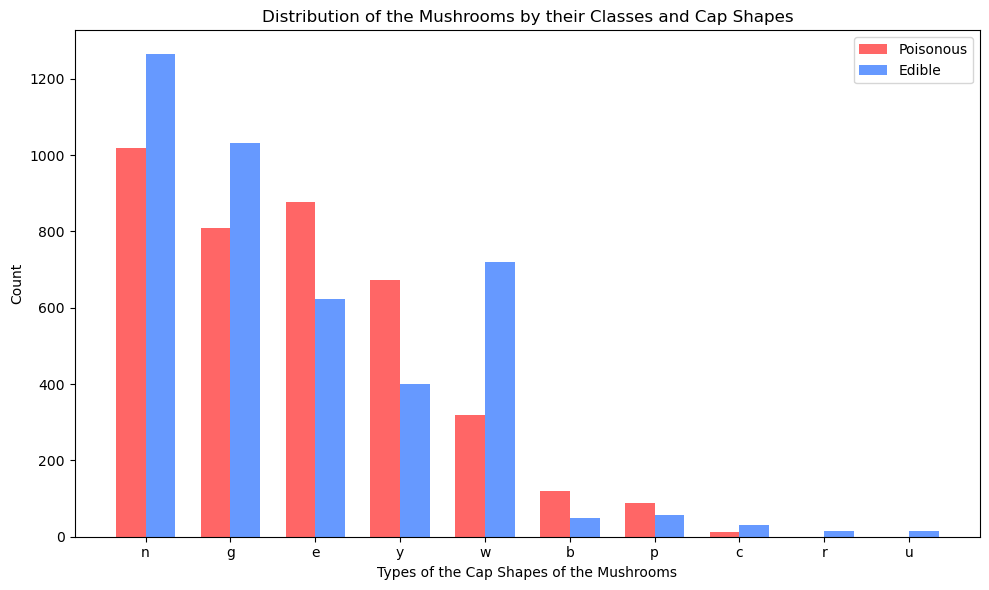

In [524]:
# About mushroom cap
# cap shape
grouped = df.groupby(['cap-shape','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))  # The label locations

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')

# Adding labels and title
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['cap-surface','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))  # The label locations
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['cap-color','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))  # The label locations

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')

# Adding labels and title
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

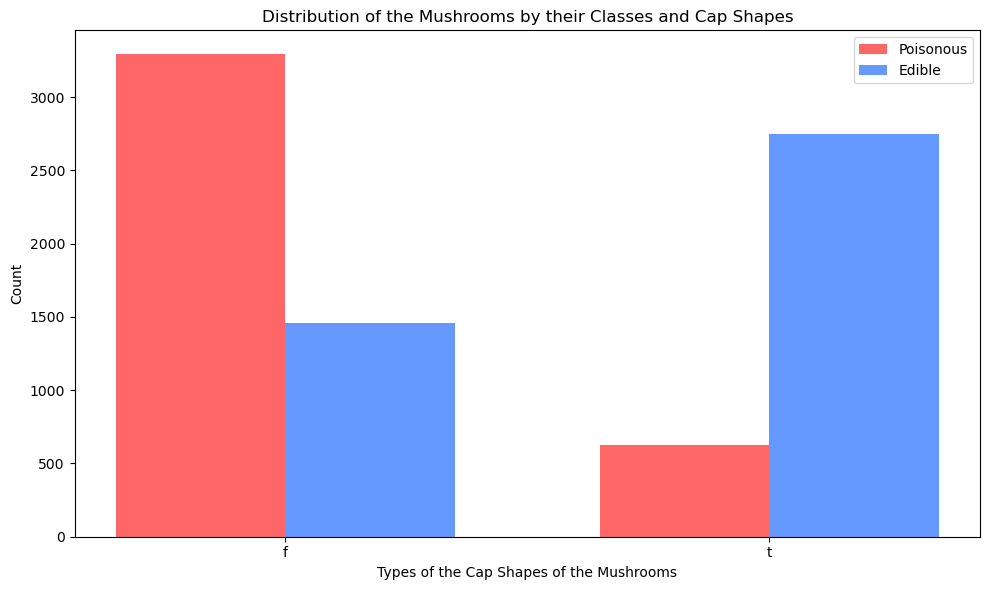

In [526]:
# Bruise
grouped = df.groupby(['bruises','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

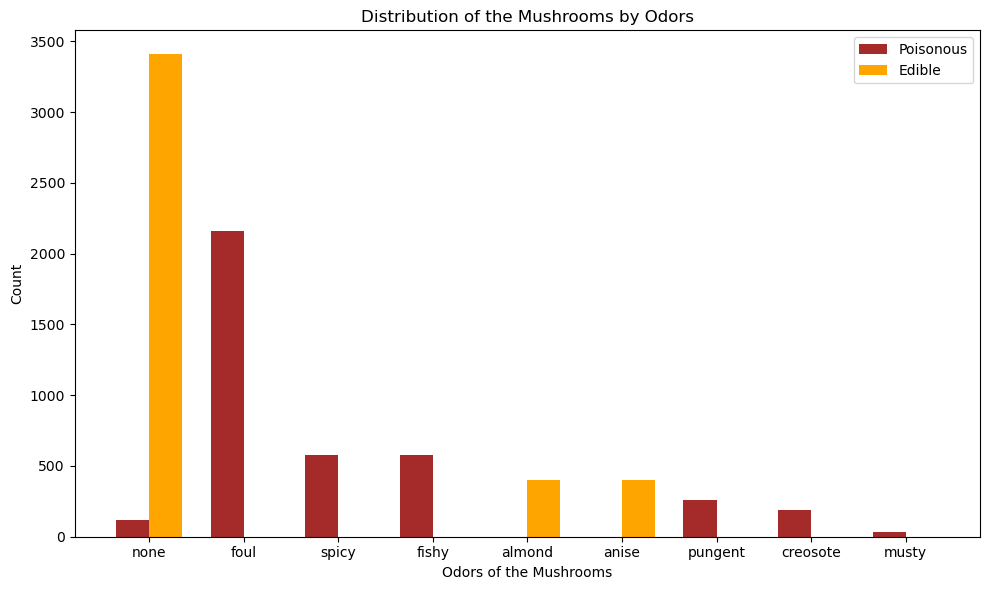

In [490]:
#odor
import numpy as np
import matplotlib.pyplot as plt
grouped = df.groupby(['odor', 'poisonous']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']  # 'p' for poisonous
edible_counts = grouped_sorted['e']     # 'e' for edible
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))  # X positions for the bars
full_labels = ['none', 'foul', 'spicy', 'fishy', 'almond', 'anise', 'pungent', 'creosote', 'musty']
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='brown')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#FFA500')
plt.xlabel('Odors of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by Odors')
plt.xticks(index + bar_width / 2, full_labels)
plt.legend()
plt.tight_layout()
plt.show()

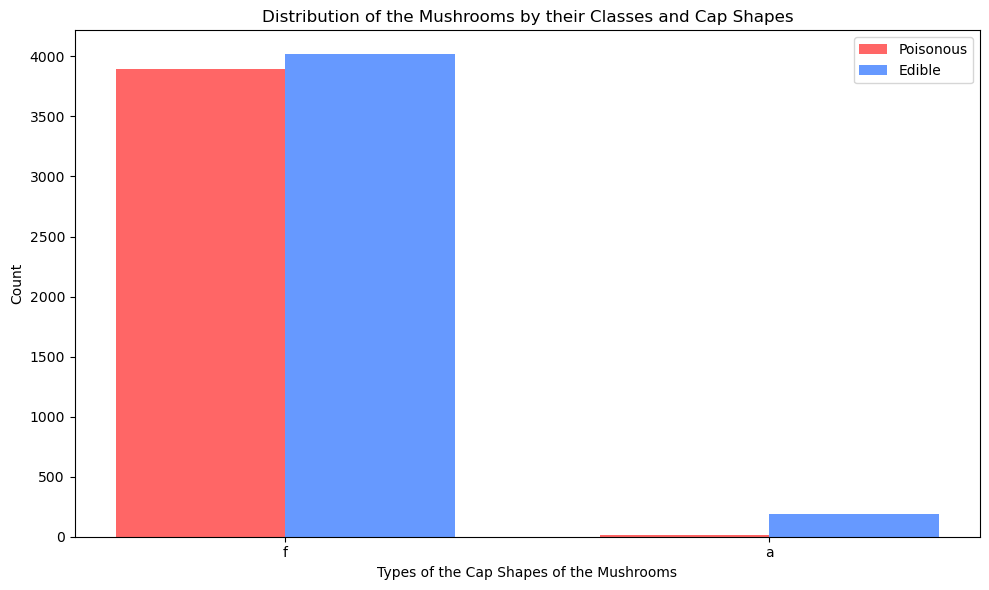

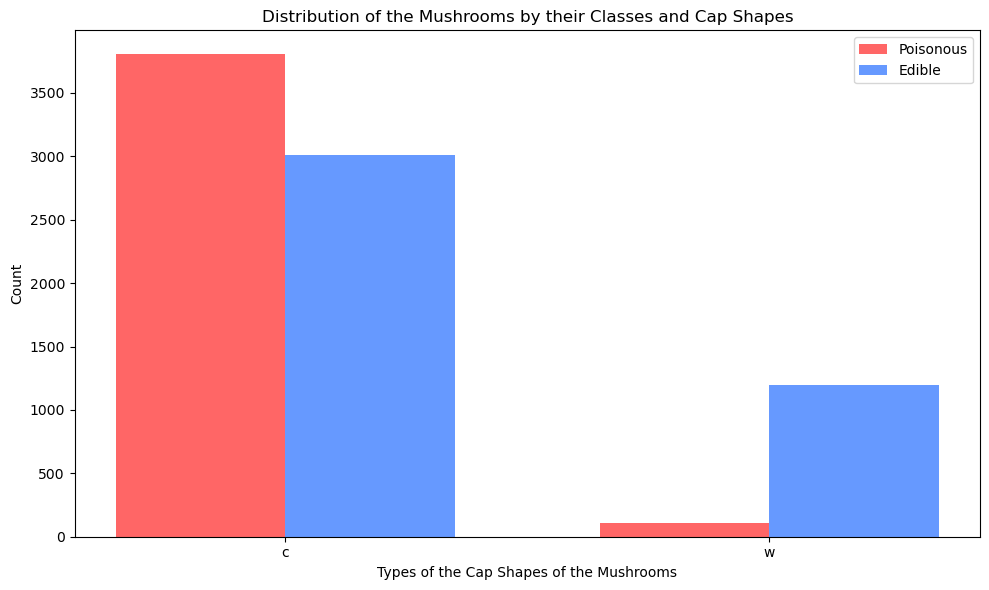

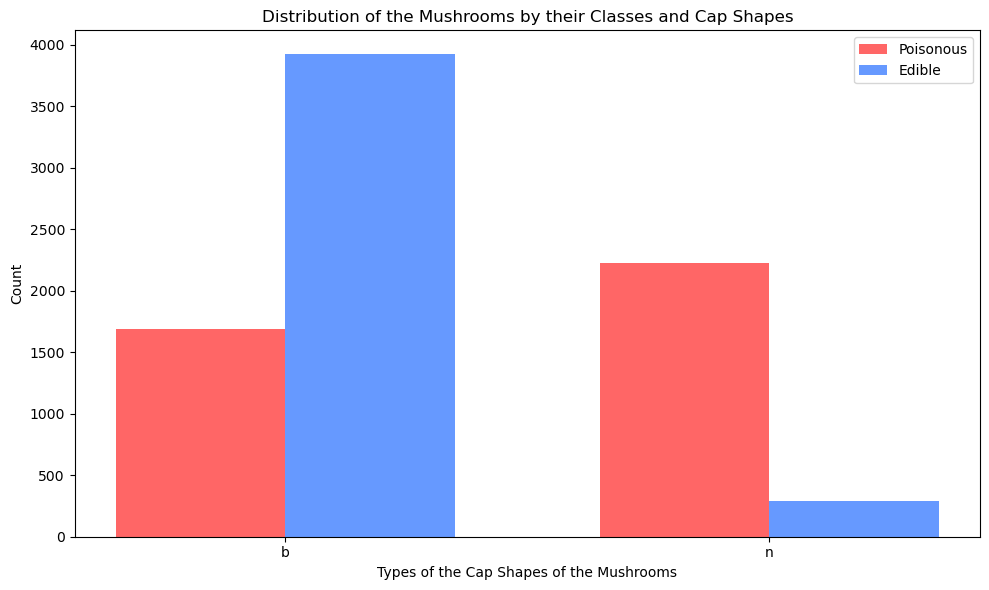

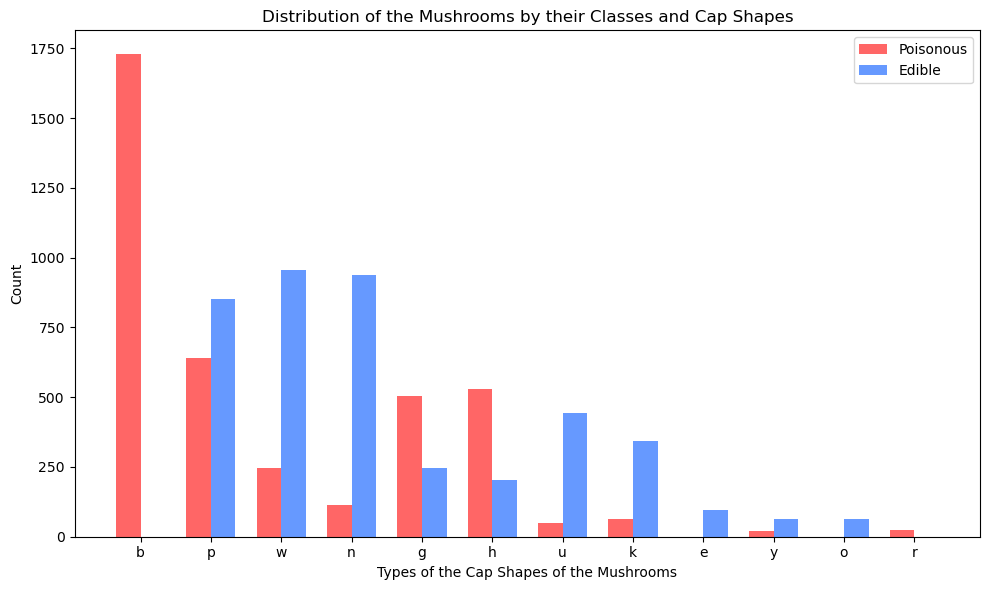

In [317]:
# gill
grouped = df.groupby(['gill-attachment','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['gill-spacing','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['gill-size','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['gill-color','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

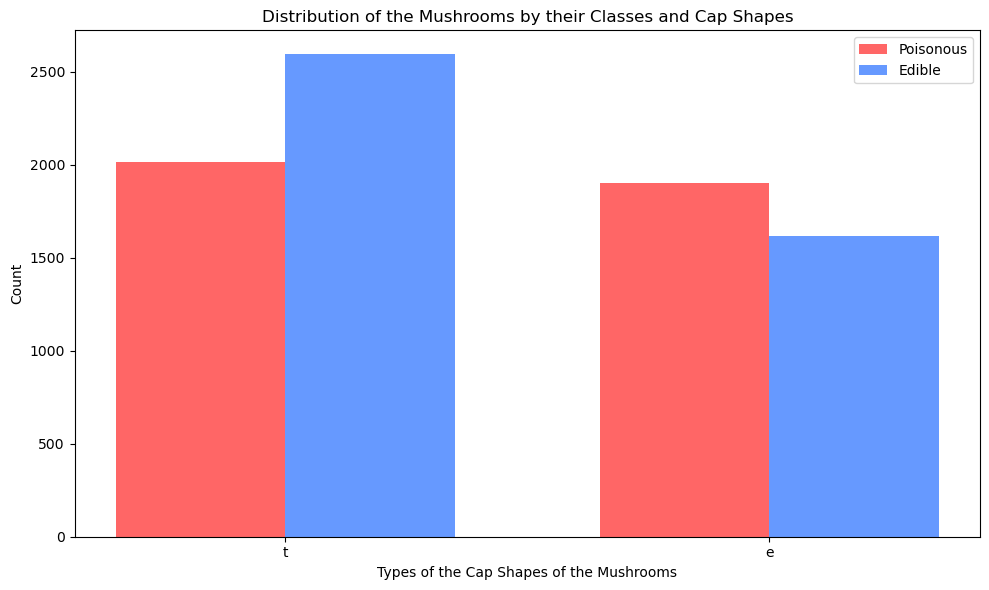

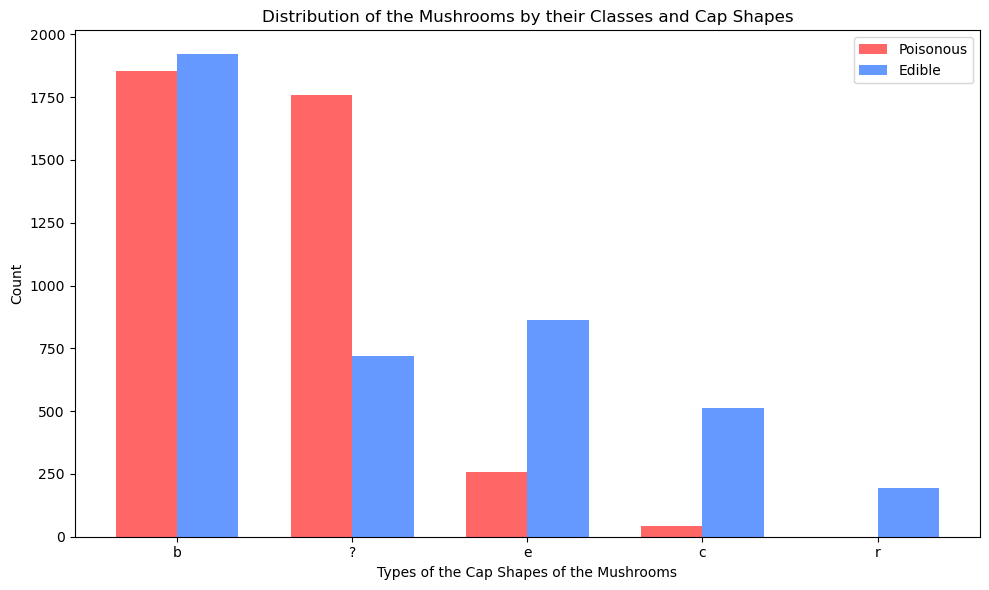

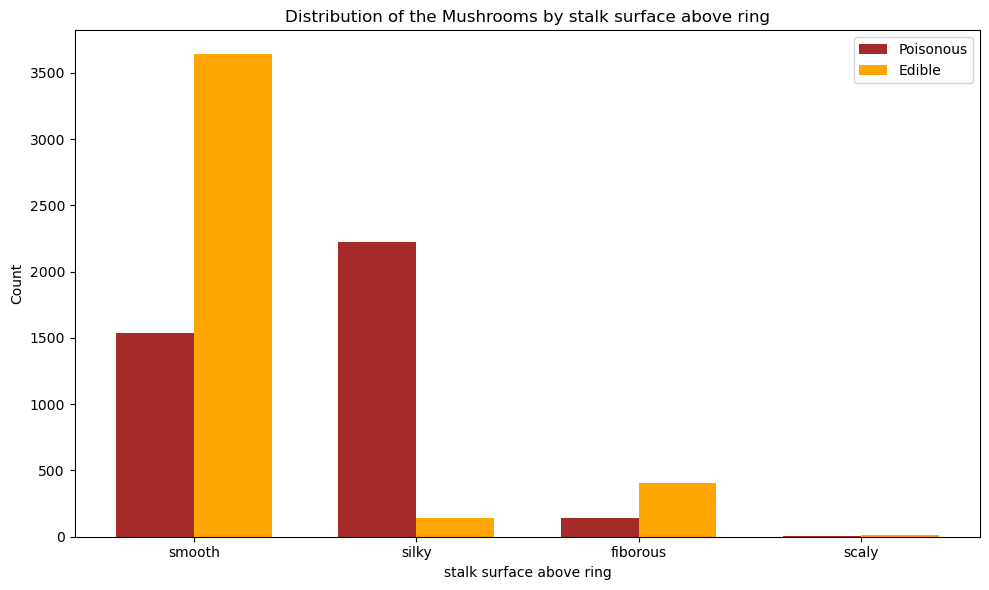

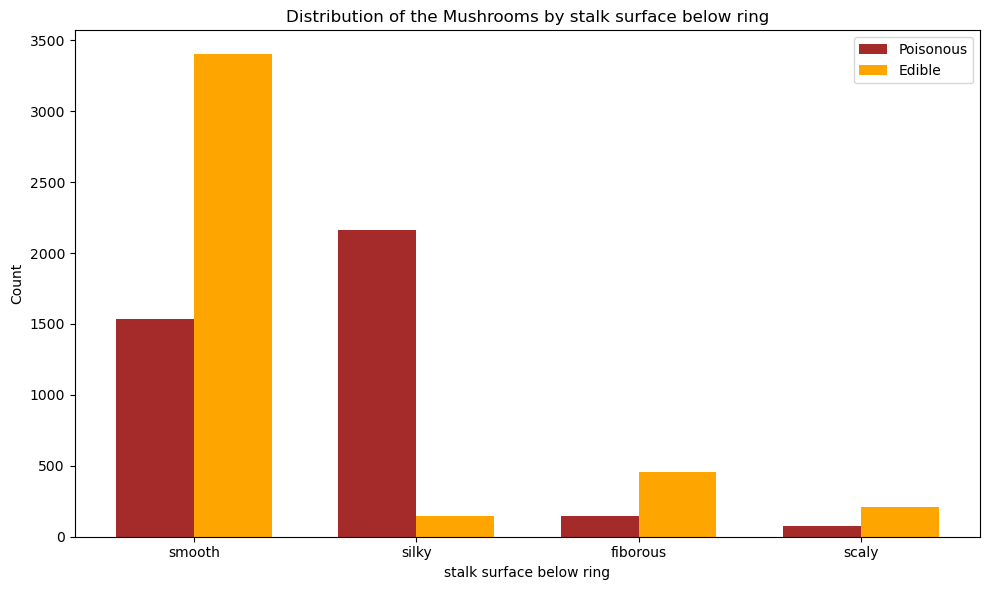

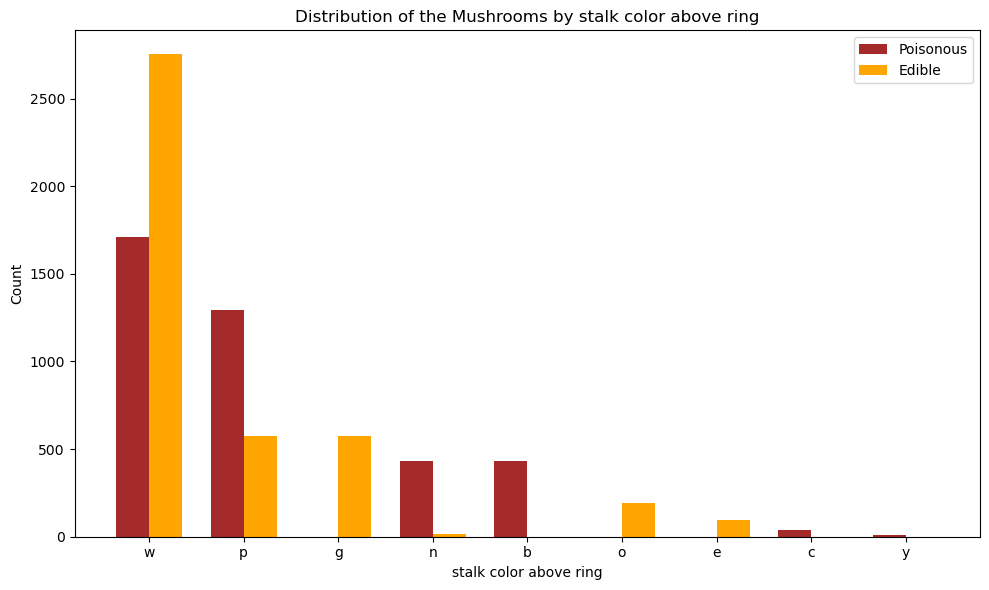

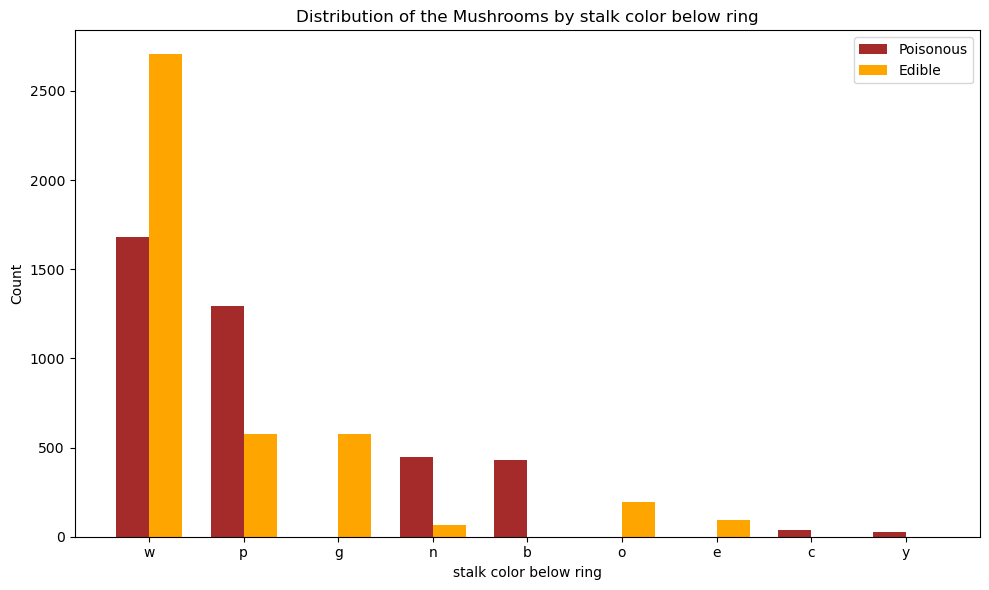

In [530]:
# stalk
grouped = df.groupby(['stalk-shape','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['stalk-root','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['stalk-surface-above-ring', 'poisonous']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']  # 'p' for poisonous
edible_counts = grouped_sorted['e']     # 'e' for edible
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))  # X positions for the bars
full_labels = ['smooth', 'silky', 'fiborous', 'scaly']
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='brown')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#FFA500')
plt.xlabel('stalk surface above ring')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by stalk surface above ring')
plt.xticks(index + bar_width / 2, full_labels)
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['stalk-surface-below-ring','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
full_labels = ['smooth', 'silky', 'fiborous', 'scaly']
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='brown')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#FFA500')
plt.xlabel('stalk surface below ring')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by stalk surface below ring')
plt.xticks(index + bar_width / 2, full_labels)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['stalk-color-above-ring','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
full_labels = ['white', 'pink', 'gray', 'brown', 'buff','orange', 'red', 'cinnamon','yellow']
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='brown')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#FFA500')
plt.xlabel('stalk color above ring')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by stalk color above ring')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['stalk-color-below-ring','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
full_labels = ['white', 'pink', 'gray', 'brown', 'buff','orange', 'red', 'cinnamon','yellow']
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='brown')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#FFA500')
plt.xlabel('stalk color below ring')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by stalk color below ring')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

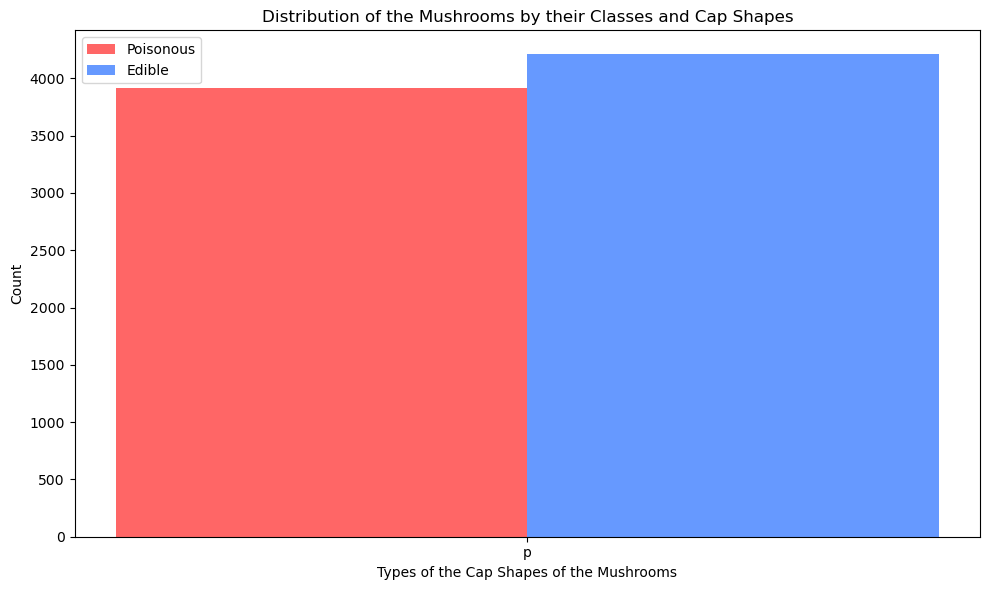

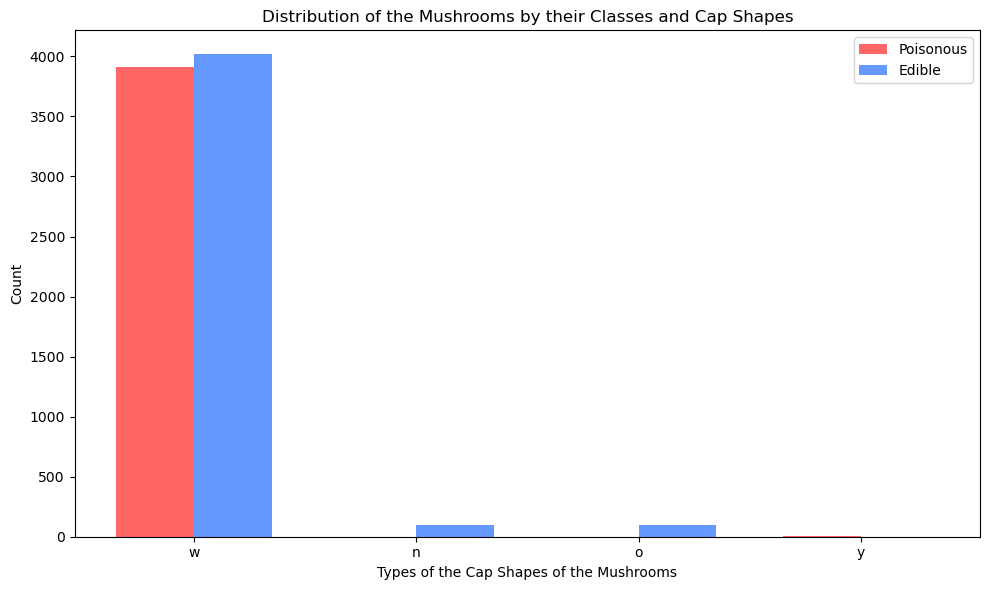

In [186]:
# veil
grouped = df.groupby(['veil-type','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['veil-color','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

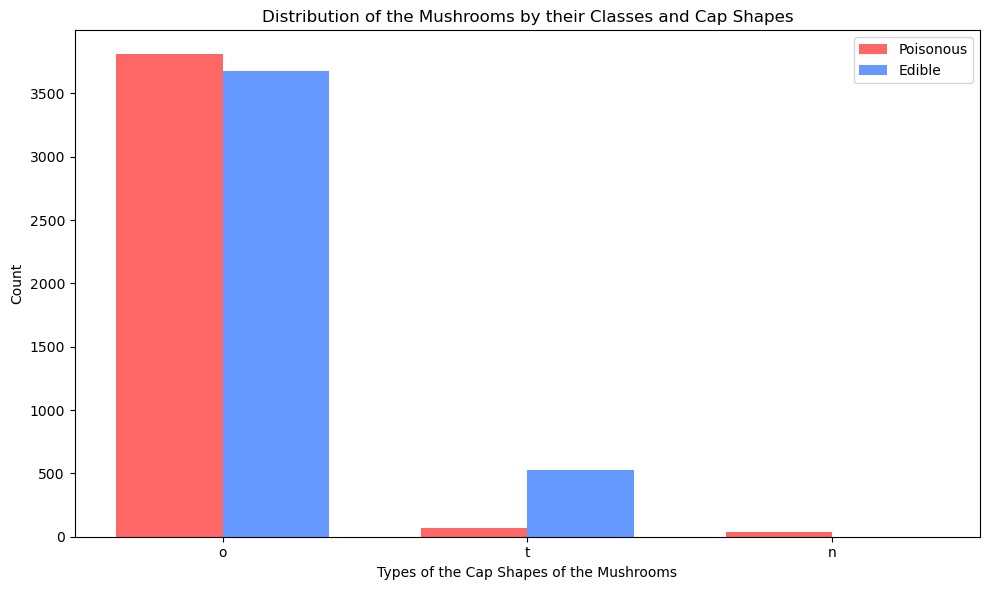

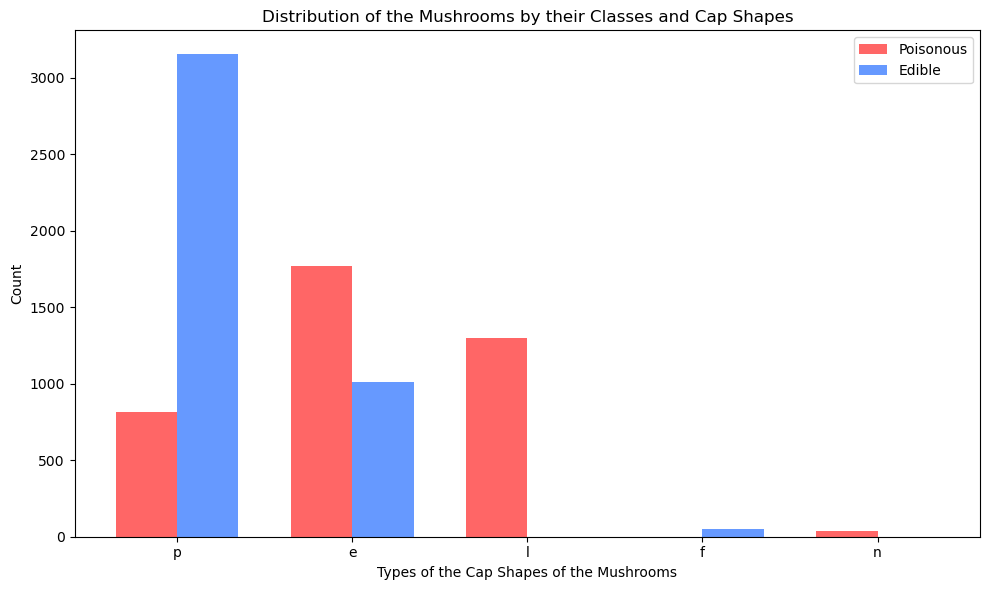

In [321]:
# ring
grouped = df.groupby(['ring-number','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

grouped = df.groupby(['ring-type','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

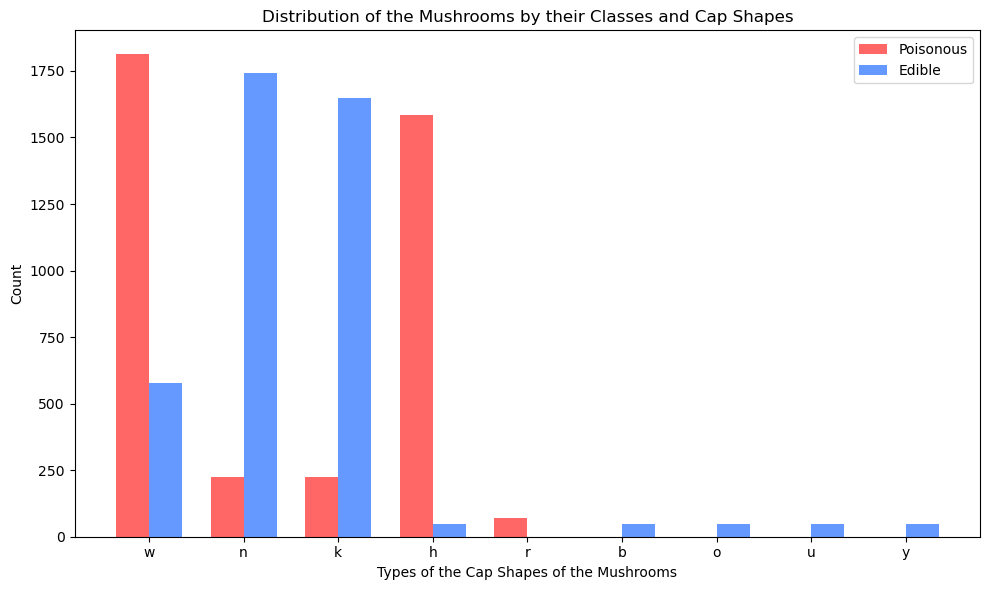

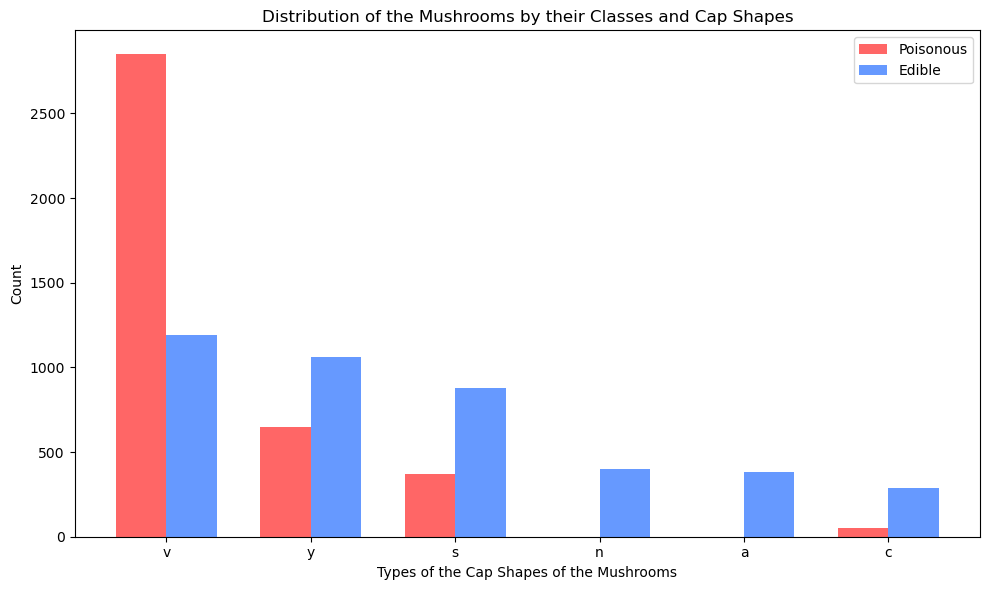

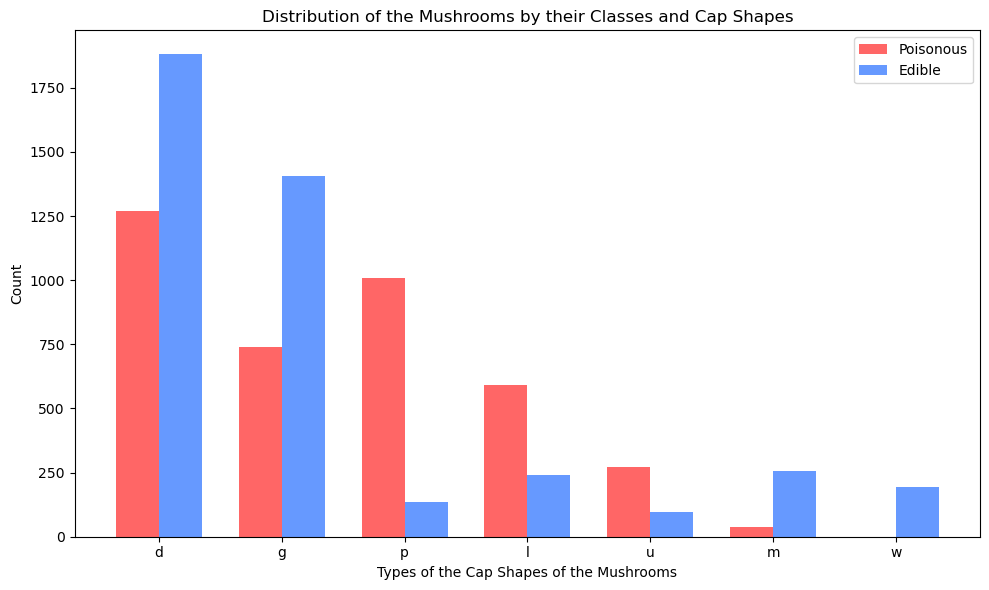

In [190]:
# spore-print-color
grouped = df.groupby(['spore-print-color','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

# population
grouped = df.groupby(['population','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

#habitat
grouped = df.groupby(['habitat','poisonous']).size().unstack(fill_value = 0)
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)
cap_shapes = grouped_sorted.index
poisonous_counts = grouped_sorted['p']
edible_counts = grouped_sorted['e']
bar_width = 0.35  # Width of the bars
index = np.arange(len(cap_shapes))
plt.figure(figsize=(10, 6))
plt.bar(index, poisonous_counts, bar_width, label='Poisonous', color='#FF6666')
plt.bar(index + bar_width, edible_counts, bar_width, label='Edible', color='#6699FF')
plt.xlabel('Types of the Cap Shapes of the Mushrooms')
plt.ylabel('Count')
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes')
plt.xticks(index + bar_width / 2, cap_shapes)  # Setting the x-ticks
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# correlation matrix
interest_columns = ['odor', 'stalk_color_above_ring','stalk_surface_below_ring', 'edibility', 

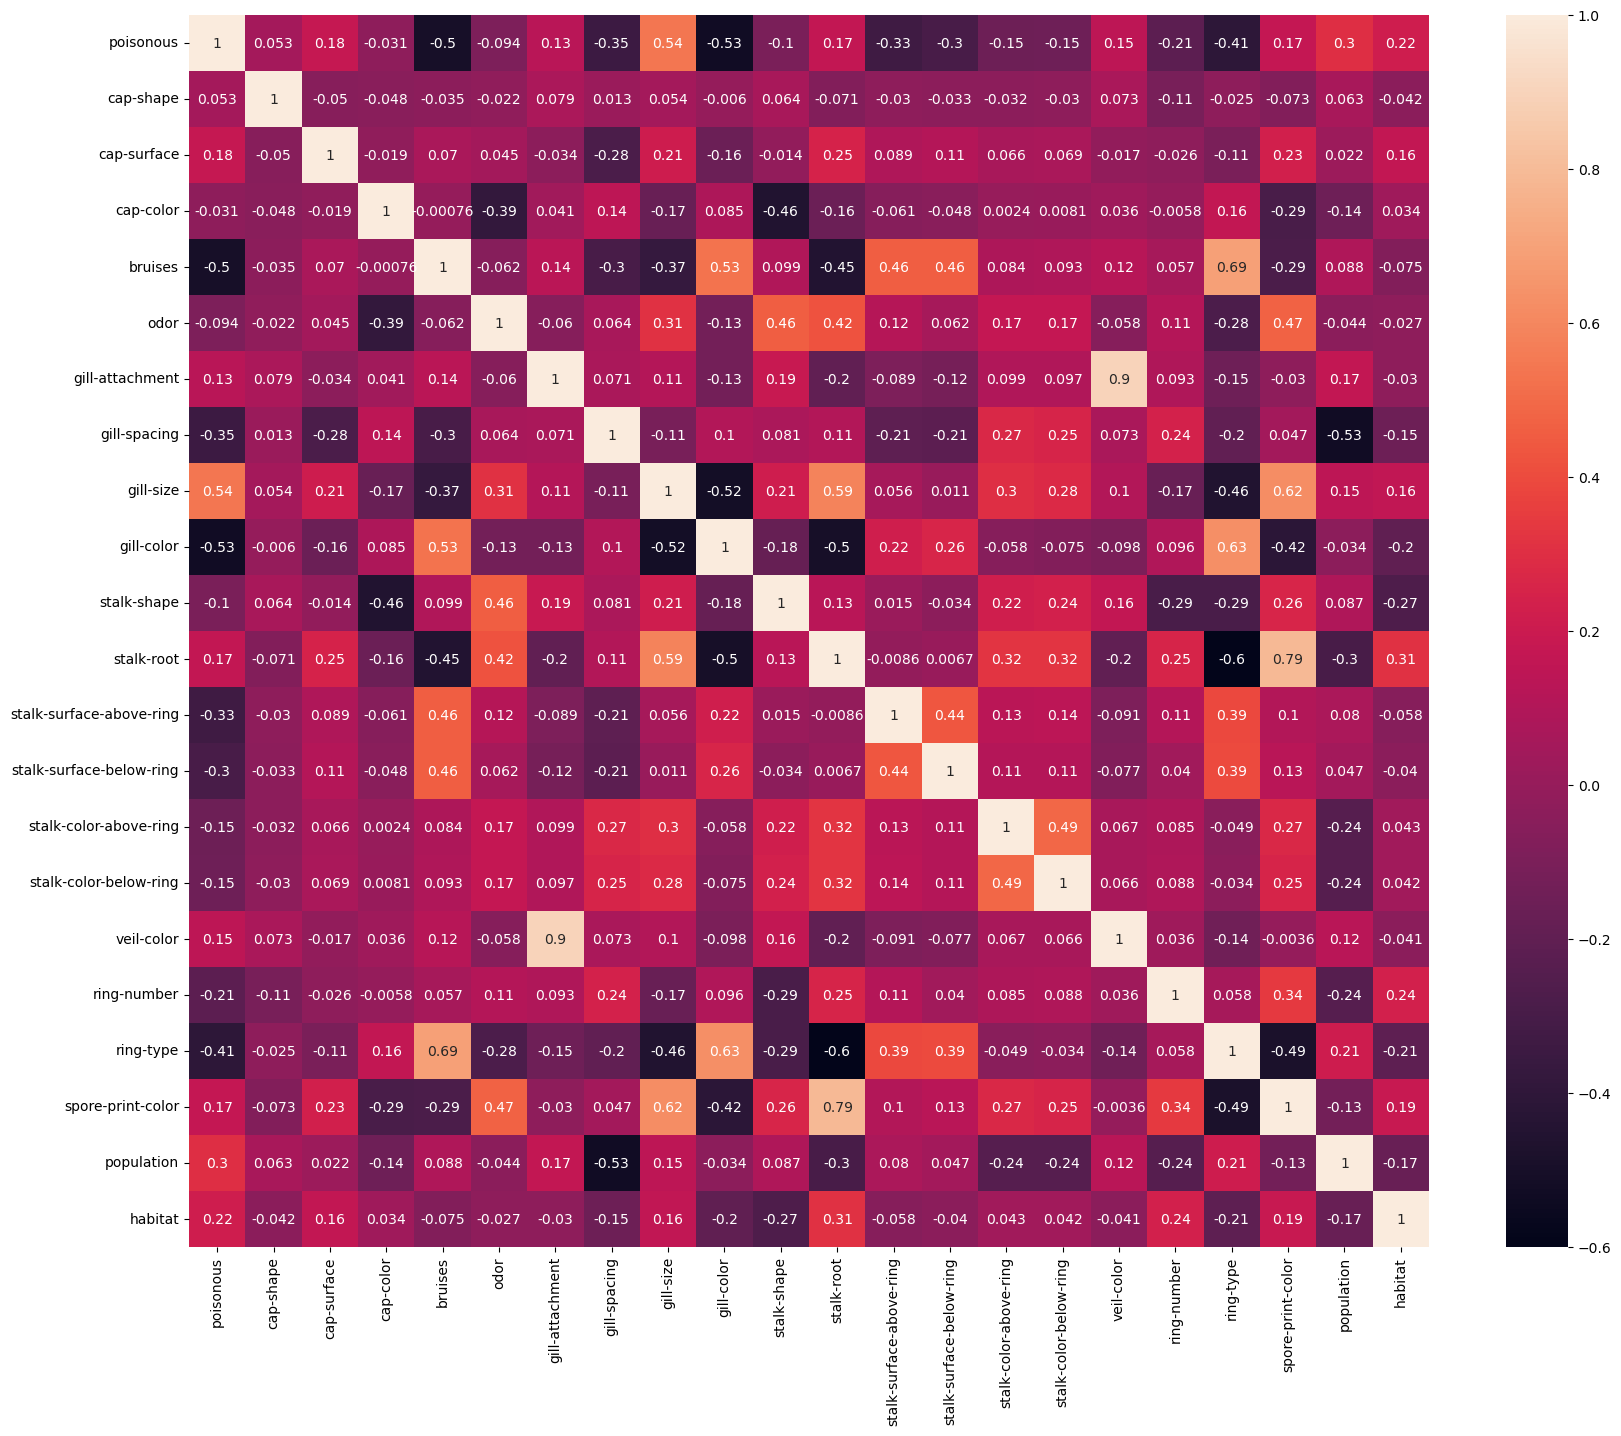

In [460]:
import seaborn as sns
df_select_encode = df.copy()
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in df_select :
   df_select_encode[i]=label.fit_transform(df_select_encode[i])

plt.figure(figsize=(20,16))
corr=df_select_encode.corr()
sns.heatmap(corr,annot=True)
plt.show()

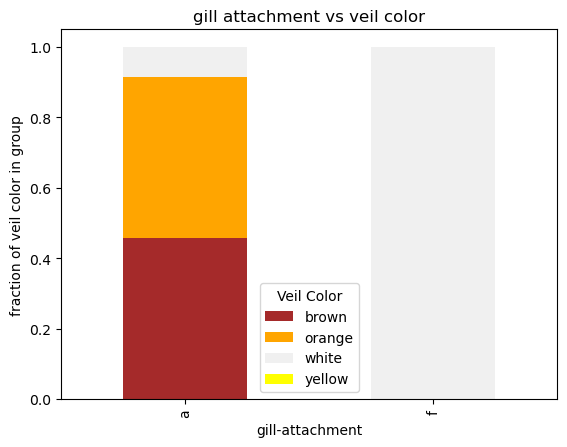

In [482]:
# we find the gill attachment cannot be fully predicted by veil color. 
crosstab = pd.crosstab(df['gill-attachment'], df['veil-color'], normalize='index')
crosstab.plot(kind='bar', stacked=True, color=['brown', 'orange', '#F0F0F0', 'yellow'])
# count_matrix = df.groupby(['gill-attachment', 'veil-color']).size().unstack()
# count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of veil color in group')
plt.title ('gill attachment vs veil color')
plt.legend(title="Veil Color", labels=['brown', 'orange', 'white', 'yellow'])
plt.show()

In [590]:
# drop column
# substitute with nan
# df = df.replace ('?', np.nan)
# df = df.drop(columns = ['veil-type'])
# count_question_marks = (df == '?').sum().sum()
# print (count_question_marks)
# nan_count_total = df.isna().sum().sum()
# print(f"Total number of NaN values in the DataFrame: {nan_count_total}")

y_dummies = pd.get_dummies(df['poisonous'])
y_dummies = y_dummies.drop(columns=['p'])
y_dummies = y_dummies.rename(columns={'e': 'edible'})
print(y_dummies)
print (df.shape)

      edible
0      False
1       True
2       True
3      False
4       True
...      ...
8119    True
8120    True
8121    True
8122   False
8123    True

[8124 rows x 1 columns]
(8124, 22)


In [592]:
print (df.shape)

(8124, 22)


In [730]:
# split the data into train, test, val
# no group problem, and no need to use stratified because the target variable is balanced
from sklearn.model_selection import train_test_split

random_state = 42
y= y_dummies
X = df.drop('poisonous', axis = 1)

# first split to separate out the training set
X_other, X_test, y_other, y_test = train_test_split(X,y,\
                    test_size = 0.2,random_state=random_state, shuffle = True)
print('Test set:',X_test.shape, y_test.shape) # 80% of points are in test
print ('other set:', X_other.shape, y_other.shape)


Test set: (1625, 22) (1625, 1)
other set: (6499, 22) (6499, 1)


In [626]:
count_question_marks = X_other.isna().sum().sum()
print (count_question_marks)
count_question_marks = X_test.isna().sum().sum()
print (count_question_marks)

0
0


In [736]:
# do KFold split on other
from sklearn.model_selection import KFold

# Flatten y_other to ensure it's 1D (if needed)
y_other = y_other.ravel()  # Assuming y_other is a pandas series, you flatten it to a 1D array

# KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform the K-fold split
for fold, (train_index, val_index) in enumerate(kf.split(X_other, y_other), start=1):
    # For X_other (assumed to be a pandas DataFrame), use .iloc
    X_train = X_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    
    # For y_other (now a NumPy array), use NumPy-style indexing
    y_train = y_other[train_index]
    y_val = y_other[val_index]
    
    # Print the shapes of the training and validation sets
    print(f"Fold {fold}")
    print('   Training set:', X_train.shape, y_train.shape)
    print('   Validation set:', X_val.shape, y_val.shape)
    

Fold 1
   Training set: (5199, 22) (5199,)
   Validation set: (1300, 22) (1300,)
Fold 2
   Training set: (5199, 22) (5199,)
   Validation set: (1300, 22) (1300,)
Fold 3
   Training set: (5199, 22) (5199,)
   Validation set: (1300, 22) (1300,)
Fold 4
   Training set: (5199, 22) (5199,)
   Validation set: (1300, 22) (1300,)
Fold 5
   Training set: (5200, 22) (5200,)
   Validation set: (1299, 22) (1299,)


In [650]:
# preprocessing
# print (X_train.head())
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

ordinal_feature = ['ring-number', 'population']
ordinal_categories = [['n', 'o', 't'], ['y','v','s','n','c','a']]
categorical_feature = X.columns.difference(ordinal_feature)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_categories), ordinal_feature),
        ('cat', categorical_transformer, categorical_feature) 
    ])

X_other_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_other), columns=np.concatenate([
    ordinal_feature,
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_feature)
]))

X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test), columns=np.concatenate([
    ordinal_feature,
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_feature)
]))

# Print the first few rows of preprocessed datasets
print (count_question_marks)
print (X_test_preprocessed.shape[0], X_test_preprocessed.shape[1])
print (X_other_preprocessed.shape[0], X_test_preprocessed.shape[1])
print (X_other_preprocessed.head())


# print(X_train_preprocessed.head())

0
1625 110
6499 110
   ring-number  population  bruises_f  bruises_t  cap-color_b  cap-color_c  \
0          1.0         1.0        1.0        0.0          0.0          0.0   
1          1.0         1.0        1.0        0.0          0.0          0.0   
2          1.0         1.0        1.0        0.0          0.0          0.0   
3          1.0         1.0        0.0        1.0          0.0          0.0   
4          1.0         3.0        0.0        1.0          0.0          0.0   

   cap-color_e  cap-color_g  cap-color_n  cap-color_p  cap-color_r  \
0          1.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          1.0          0.0          0.0   
2          1.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          1.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   cap-color_u  cap-color_w  cap-color_y  cap-shape_b  cap-shape_c  \
0          0.0      

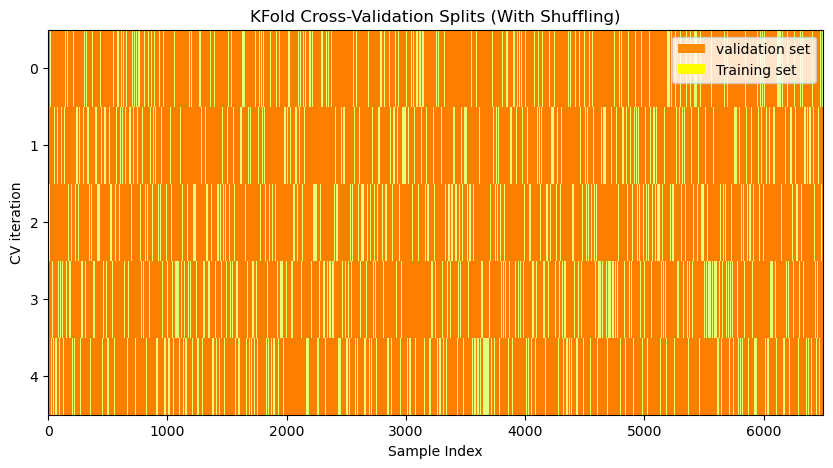

In [726]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

plt.figure(figsize=(10, 5))

# Number of samples
n_samples = X_other_preprocessed.shape[0]
n_splits = kf.get_n_splits()

# Create an array to represent the splits
cv_splits = np.zeros((n_splits, n_samples))

# Assign indices for training and testing for visualization
for i, (train_index, val_index) in enumerate(kf.split(X_other_preprocessed, y_other_flattened)):
    cv_splits[i, train_index] = 1  # Mark the training indices as 1

# Plotting
plt.imshow(cv_splits, aspect='auto', cmap='Wistia', interpolation='nearest')

# Add titles and labels
plt.title('KFold Cross-Validation Splits (With Shuffling)')
plt.ylabel('CV iteration')
plt.xlabel('Sample Index')

# Customizing legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='FFA07A', label='validation set'),
                   Patch(facecolor='FFD700', label='Training set')]
plt.legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.show()


